In [1]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
suicide_df = pd.read_csv('D:\master.csv')
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
suicide_df.shape

(27820, 12)

In [4]:
suicide_df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
object_columns = [ column for column in suicide_df.columns if suicide_df[column].dtype == 'object']
object_columns

['country', 'sex', 'age', 'country-year', ' gdp_for_year ($) ', 'generation']

In [7]:
suicide_df.describe(percentiles=[0.1,0.25,.50,0.75,0.90,0.99,1])

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
10%,1989.000000,0.000000,1.730330e+04,0.000000,0.648000,1524.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
90%,2013.000000,496.000000,4.960714e+06,33.291000,0.897000,43487.000000
99%,2015.000000,3993.670000,1.999273e+07,91.571000,0.932370,89634.000000


In [8]:
count1 = len(suicide_df.loc[suicide_df['suicides_no'].between(np.percentile(suicide_df.suicides_no,0),
                                                             np.percentile(suicide_df.suicides_no,99))])
count2 = len(suicide_df.loc[suicide_df['suicides_no'].between(np.percentile(suicide_df.suicides_no,99),
                                                             np.percentile(suicide_df.suicides_no,100))])
count1,count2

(27541, 279)

In [9]:
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [10]:
suicide_df.select_dtypes(include=[object]).head()

,country,sex,age,country-year,gdp_for_year ($),generation
0,Albania,male,15-24 years,Albania1987,"2,156,624,900",Generation X
1,Albania,male,35-54 years,Albania1987,"2,156,624,900",Silent
2,Albania,female,15-24 years,Albania1987,"2,156,624,900",Generation X
3,Albania,male,75+ years,Albania1987,"2,156,624,900",G.I. Generation
4,Albania,male,25-34 years,Albania1987,"2,156,624,900",Boomers


In [11]:
suicide_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [12]:
suicide_df.select_dtypes(exclude=[object]).head()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,1987,21,312900,6.71,NaN,796
1,1987,16,308000,5.19,NaN,796
2,1987,14,289700,4.83,NaN,796
3,1987,1,21800,4.59,NaN,796
4,1987,9,274300,3.28,NaN,796


In [13]:
suicide_df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [14]:
suicide_df.shape

(27820, 12)

In [15]:
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [16]:
suicide_df.drop(['HDI for year','country-year'],axis = 1 , inplace=True)

In [17]:
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [18]:
suicide_df['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [19]:
suicide_df.loc[:,suicide_df.nunique()==1].columns

Index([], dtype='object')

In [20]:
suicide_df.loc[:,suicide_df.nunique()== 6].columns 

Index(['age', 'generation'], dtype='object')

In [21]:
suicide_df['age'].value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [22]:
suicide_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [23]:
suicide_df.rename(columns={'suicides/100k pop': 'Suicides100kPop',
                           ' gdp_for_year ($) ': 'GDPForYear',
                           'gdp_per_capita ($)': 'GDPPerCapita'},
                                                   inplace=True)

In [24]:
suicide_df.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [25]:
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          27820 non-null  object 
 1   year             27820 non-null  int64  
 2   sex              27820 non-null  object 
 3   age              27820 non-null  object 
 4   suicides_no      27820 non-null  int64  
 5   population       27820 non-null  int64  
 6   Suicides100kPop  27820 non-null  float64
 7   GDPForYear       27820 non-null  object 
 8   GDPPerCapita     27820 non-null  int64  
 9   generation       27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [26]:
suicide_df['GDPForYear'] = suicide_df['GDPForYear'].apply(lambda x : x.replace(',',''))

In [27]:
suicide_df['GDPForYear'] = suicide_df['GDPForYear'].astype('int64')

In [28]:
suicide_df.GDPForYear = ((suicide_df.GDPForYear) / (1000000))

In [29]:
suicide_df.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156.6249,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156.6249,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156.6249,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156.6249,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156.6249,796,Boomers


In [30]:
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          27820 non-null  object 
 1   year             27820 non-null  int64  
 2   sex              27820 non-null  object 
 3   age              27820 non-null  object 
 4   suicides_no      27820 non-null  int64  
 5   population       27820 non-null  int64  
 6   Suicides100kPop  27820 non-null  float64
 7   GDPForYear       27820 non-null  float64
 8   GDPPerCapita     27820 non-null  int64  
 9   generation       27820 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 2.1+ MB


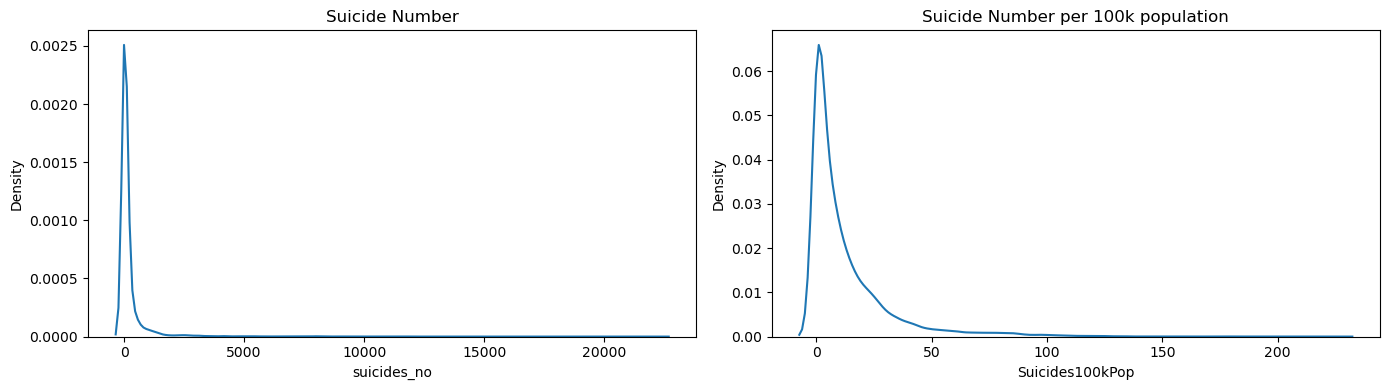

In [31]:
plt.figure(figsize=(14,4))

plt.subplot(121)
plt.title('Suicide Number')
sns.distplot(suicide_df['suicides_no'],hist=False)

plt.subplot(122)
plt.title('Suicide Number per 100k population')
sns.distplot(suicide_df['Suicides100kPop'],hist=False)
plt.tight_layout()
plt.show()


In [32]:
lat_long = pd.read_csv('D:\country_data.csv')
lat_long.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [33]:
lat_long.columns

Index(['country', 'latitude', 'longitude', 'name'], dtype='object')

In [34]:
lat_long['country'].value_counts()

AD    1
MX    1
MZ    1
NC    1
NE    1
     ..
GR    1
GS    1
GT    1
GU    1
ZW    1
Name: country, Length: 244, dtype: int64

In [35]:
lat_long.rename(columns={'country':'countrycode','name':'country'},inplace=True)

In [36]:
lat_long.head()

,countrycode,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [37]:
temp1 = pd.DataFrame(suicide_df.country.unique())
temp2 = pd.DataFrame(lat_long.country.unique())
temp2.equals(temp1)

False

In [38]:
df = suicide_df.copy()
df = df.merge(lat_long,how='left',on='country')
df.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,generation,countrycode,latitude,longitude
0,Albania,1987,male,15-24 years,21,312900,6.71,2156.6249,796,Generation X,AL,41.153332,20.168331
1,Albania,1987,male,35-54 years,16,308000,5.19,2156.6249,796,Silent,AL,41.153332,20.168331
2,Albania,1987,female,15-24 years,14,289700,4.83,2156.6249,796,Generation X,AL,41.153332,20.168331
3,Albania,1987,male,75+ years,1,21800,4.59,2156.6249,796,G.I. Generation,AL,41.153332,20.168331
4,Albania,1987,male,25-34 years,9,274300,3.28,2156.6249,796,Boomers,AL,41.153332,20.168331


In [39]:
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [40]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
Suicides100kPop       0
GDPForYear            0
GDPPerCapita          0
generation            0
countrycode        1008
latitude           1008
longitude          1008
dtype: int64

In [41]:
df.shape

(27820, 13)

In [42]:
df.loc[df.countrycode.isnull()]#.country.unique()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,generation,countrycode,latitude,longitude
4904,Cabo Verde,2011,male,75+ years,2,4954,40.37,1864.824081,4124,Silent,NaN,NaN,NaN
4905,Cabo Verde,2011,male,35-54 years,18,47077,38.24,1864.824081,4124,Generation X,NaN,NaN,NaN
4906,Cabo Verde,2011,male,25-34 years,8,42962,18.62,1864.824081,4124,Millenials,NaN,NaN,NaN
4907,Cabo Verde,2011,female,55-74 years,2,19887,10.06,1864.824081,4124,Boomers,NaN,NaN,NaN
4908,Cabo Verde,2011,male,15-24 years,5,57386,8.71,1864.824081,4124,Millenials,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21927,Saint Vincent and Grenadines,2015,female,75+ years,0,2012,0.00,756.666667,7496,Silent,NaN,NaN,NaN
21928,Saint Vincent and Grenadines,2015,male,25-34 years,0,8762,0.00,756.666667,7496,Millenials,NaN,NaN,NaN
21929,Saint Vincent and Grenadines,2015,male,5-14 years,0,9266,0.00,756.666667,7496,Generation Z,NaN,NaN,NaN
21930,Saint Vincent and Grenadines,2015,male,55-74 years,0,7031,0.00,756.666667,7496,Boomers,NaN,NaN,NaN


In [43]:
df.loc[df.countrycode.isnull()].country.unique()

array(['Cabo Verde', 'Republic of Korea', 'Russian Federation',
       'Saint Vincent and Grenadines'], dtype=object)

In [44]:
suicide_df.loc[df['country']=='Cabo Verde', 'country'] = 'Cape Verde'
suicide_df.loc[df['country']=='Republic of Korea', 'country'] = 'South Korea'
suicide_df.loc[df['country']=='Russian Federation', 'country'] = 'Russia'
suicide_df.loc[df['country']=='Saint Vincent and Grenadines', 'country'] = 'Saint Vincent and the Grenadines'
suicide_df = suicide_df.merge(lat_long[['latitude','longitude','country']], how = 'left', on = 'country')

In [45]:
temp = suicide_df.copy()
table = temp.groupby(['country'])['suicides_no'].sum()
temp = temp.merge(table.reset_index(), how='left',on='country')
suicide_df['suicide_country'] = temp['suicides_no_y']
suicide_df.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,generation,latitude,longitude,suicide_country
0,Albania,1987,male,15-24 years,21,312900,6.71,2156.6249,796,Generation X,41.153332,20.168331,1970
1,Albania,1987,male,35-54 years,16,308000,5.19,2156.6249,796,Silent,41.153332,20.168331,1970
2,Albania,1987,female,15-24 years,14,289700,4.83,2156.6249,796,Generation X,41.153332,20.168331,1970
3,Albania,1987,male,75+ years,1,21800,4.59,2156.6249,796,G.I. Generation,41.153332,20.168331,1970
4,Albania,1987,male,25-34 years,9,274300,3.28,2156.6249,796,Boomers,41.153332,20.168331,1970


In [46]:
suicide_df['country'].loc[suicide_df['suicides_no'].between(np.percentile(suicide_df.suicides_no,99),
                                                             np.percentile(suicide_df.suicides_no,100))].unique()

array(['Japan', 'South Korea', 'Russia', 'Ukraine', 'United States'],
      dtype=object)

In [47]:
suicide_df.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,generation,latitude,longitude,suicide_country
0,Albania,1987,male,15-24 years,21,312900,6.71,2156.6249,796,Generation X,41.153332,20.168331,1970
1,Albania,1987,male,35-54 years,16,308000,5.19,2156.6249,796,Silent,41.153332,20.168331,1970
2,Albania,1987,female,15-24 years,14,289700,4.83,2156.6249,796,Generation X,41.153332,20.168331,1970
3,Albania,1987,male,75+ years,1,21800,4.59,2156.6249,796,G.I. Generation,41.153332,20.168331,1970
4,Albania,1987,male,25-34 years,9,274300,3.28,2156.6249,796,Boomers,41.153332,20.168331,1970


In [48]:
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          27820 non-null  object 
 1   year             27820 non-null  int64  
 2   sex              27820 non-null  object 
 3   age              27820 non-null  object 
 4   suicides_no      27820 non-null  int64  
 5   population       27820 non-null  int64  
 6   Suicides100kPop  27820 non-null  float64
 7   GDPForYear       27820 non-null  float64
 8   GDPPerCapita     27820 non-null  int64  
 9   generation       27820 non-null  object 
 10  latitude         27820 non-null  float64
 11  longitude        27820 non-null  float64
 12  suicide_country  27820 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 3.0+ MB


<Axes: xlabel='country'>

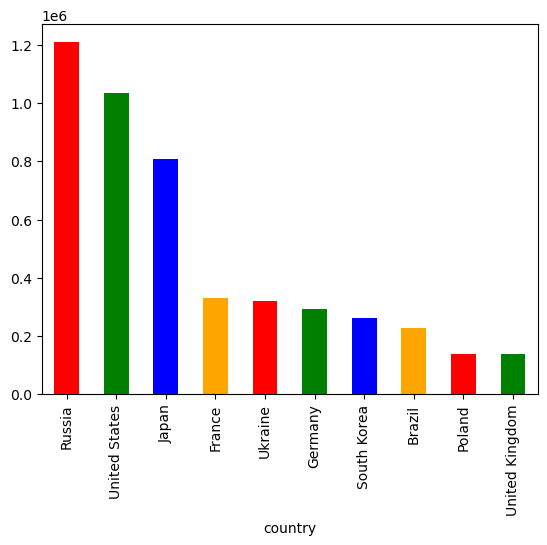

In [49]:
df = suicide_df.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False).head(10)
df.plot.bar(color =['red', 'green', 'blue','orange'])

In [50]:
#df = suicide_df.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False).head(10)
#df.plot.bar(figsize=(15,8),color =['red', 'green', 'blue','orange'])

<Axes: xlabel='country'>

<Figure size 800x600 with 0 Axes>

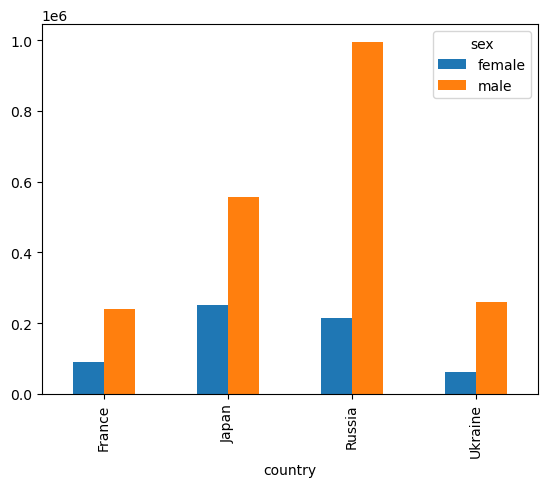

In [51]:
plt.figure(figsize=(8,6))
df = suicide_df.loc[((suicide_df.country == 'Russia') | (suicide_df.country == ' United States ') |
                    (suicide_df.country == 'Japan') | (suicide_df.country=='France') | 
                    (suicide_df.country=='Ukraine'))].groupby(['country','sex'])['suicides_no'].sum().unstack(fill_value=0).head(10)
df.plot.bar()

Text(0.5, 1.0, 'Suicide Number - Countrywise')

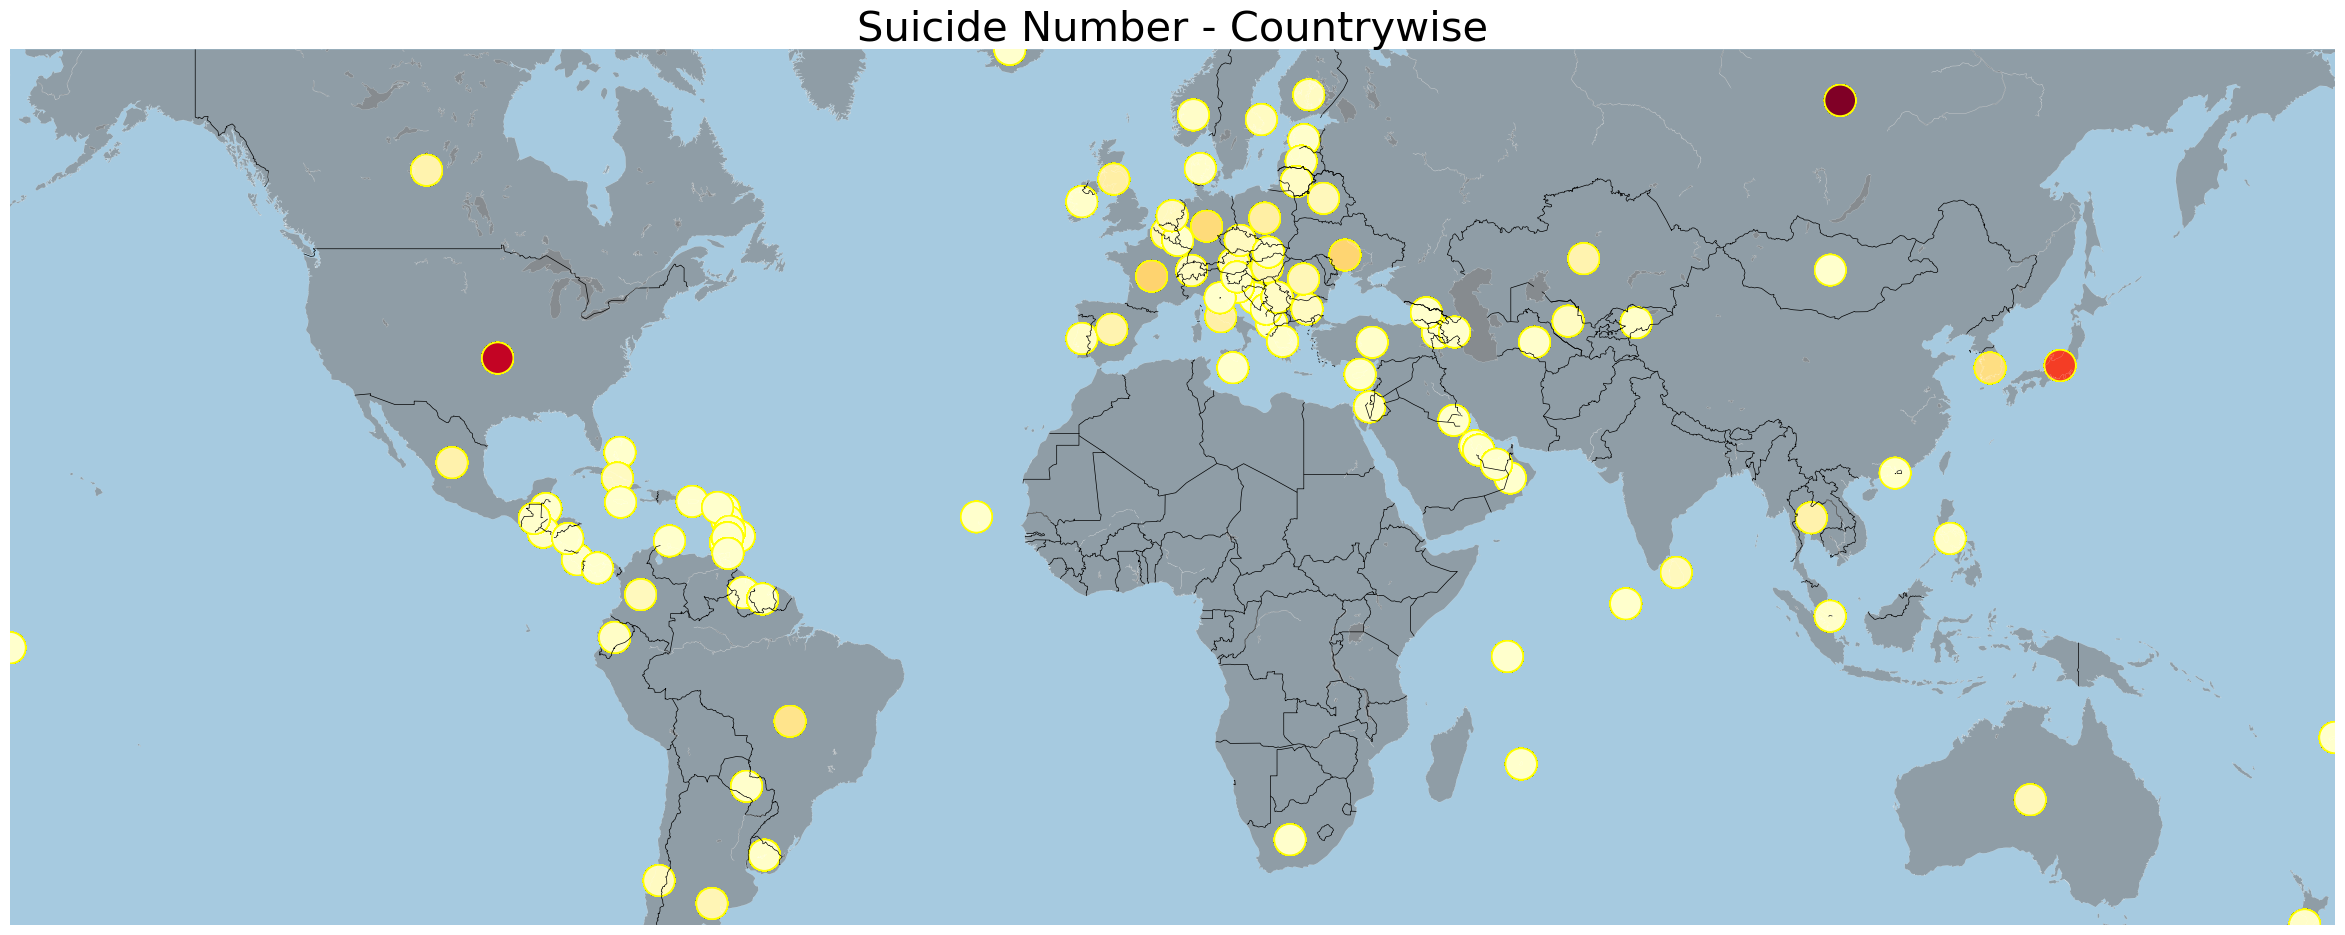

In [52]:
from mpl_toolkits.basemap import Basemap

lat_min = min(suicide_df['latitude'])
lat_max = max(suicide_df['latitude'])
lon_min = min(suicide_df['longitude'])
lon_max = max(suicide_df['longitude'])

m = Basemap(
    projection='merc', 
    llcrnrlat=lat_min, 
    urcrnrlat=lat_max, 
    llcrnrlon=lon_min, 
    urcrnrlon=lon_max,
    resolution='l'
)
# Draw the components of the map

longitudes = suicide_df['longitude'].tolist()
latitudes = suicide_df['latitude'].tolist()
suicide_count = suicide_df['suicide_country'].values
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(1,1,1)
ax = m.drawcountries()
ax = m.drawcoastlines(linewidth=0.1, color="white")
ax = m.fillcontinents(color='grey', alpha=0.6, lake_color='grey')
ax = m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
ax = m.scatter(longitudes, latitudes, c=suicide_count,s=500, zorder = 1,linewidth=1,latlon=True, edgecolors='yellow',cmap='YlOrRd'
               ,alpha=1)
plt.title('Suicide Number - Countrywise', fontsize=30)

In [53]:
df.head()

sex,female,male
country,,
France,89419,239708
Japan,251630,555272
Russia,214330,995412
Ukraine,61377,258573


<Axes: xlabel='country'>

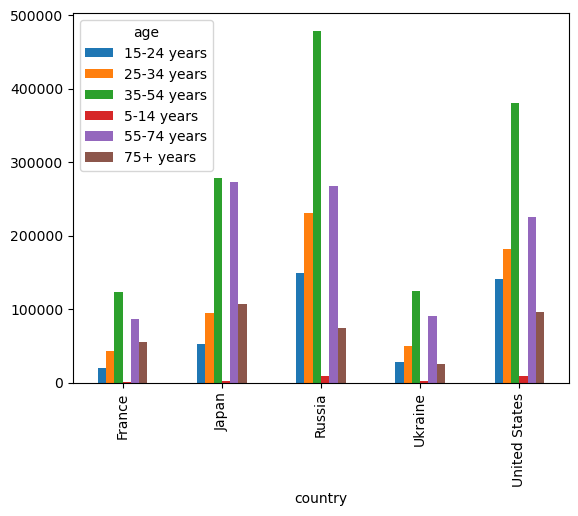

In [54]:
#plt.figure(figsize=(8,6))
df = suicide_df.loc[((suicide_df.country=='Russia') | (suicide_df.country=='United States')
                     | (suicide_df.country=='Japan') | (suicide_df.country=='France')
                    | (suicide_df.country=='Ukraine'))].groupby(['country','age'])['suicides_no'].sum().unstack(fill_value=0).head(10)
df.plot.bar()

In [61]:
suicide_df.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,generation,latitude,longitude,suicide_country
0,Albania,1987,male,15-24 years,21,312900,6.71,2156.6249,796,Generation X,41.153332,20.168331,1970
1,Albania,1987,male,35-54 years,16,308000,5.19,2156.6249,796,Silent,41.153332,20.168331,1970
2,Albania,1987,female,15-24 years,14,289700,4.83,2156.6249,796,Generation X,41.153332,20.168331,1970
3,Albania,1987,male,75+ years,1,21800,4.59,2156.6249,796,G.I. Generation,41.153332,20.168331,1970
4,Albania,1987,male,25-34 years,9,274300,3.28,2156.6249,796,Boomers,41.153332,20.168331,1970


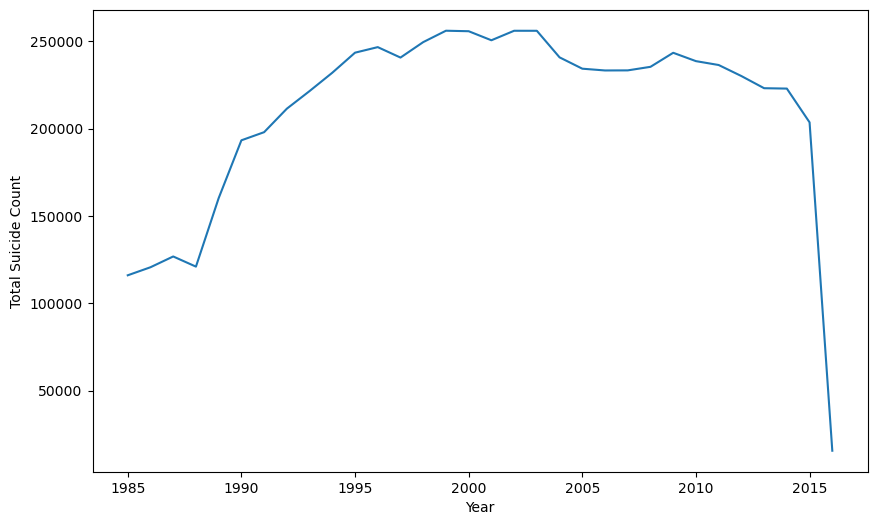

<Axes: xlabel='year'>

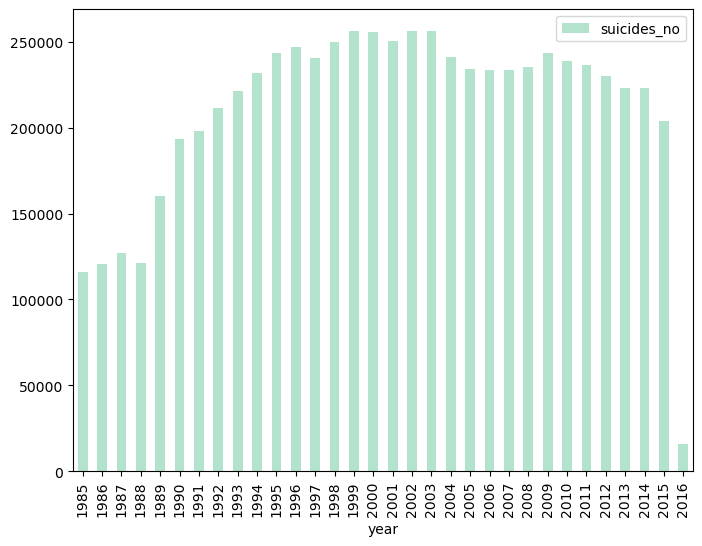

In [55]:
plt.figure(figsize=(10, 6))


df_time = suicide_df.groupby(["year"]).suicides_no.sum()
sns.lineplot(data = df_time)
plt.xlabel("Year")
plt.ylabel("Total Suicide Count")
plt.show()

#Year against suicide rate of the year Bar plot
df = suicide_df.groupby(['year'])['suicides_no'].sum()
df.plot(kind='bar',legend=True,figsize=(8,6),colormap='Pastel2')

In [64]:
print("Percent rows of 2015 :",round((len(suicide_df.loc[suicide_df.year==2015])/len(suicide_df.index))*100,2),"%")
print("Countries recorded in 2015 : ", len(suicide_df['country'].loc[suicide_df.year==2015].unique()))
print("Percent rows of 2016 :",round((len(suicide_df.loc[suicide_df.year==2016])/len(suicide_df.index))*100,2),"%")
print("Countries recorded in 2016 : ",len(suicide_df['country'].loc[suicide_df.year==2016].unique()))

Percent rows of 2015 : 2.67 %
Countries recorded in 2015 :  62
Percent rows of 2016 : 0.58 %
Countries recorded in 2016 :  16


In [65]:
temp = suicide_df.copy()
table = temp.groupby(['country','year'])['suicides_no'].sum()
temp = temp.merge(table.reset_index(), how='left',on=['country','year'])
temp = temp.sort_values(by='suicides_no_y',ascending = False)
temp[['country','year','suicides_no_y']].drop_duplicates(keep='last').head(10)

,country,year,suicides_no_y
20999,Russia,1994,61420
21019,Russia,1995,60548
21022,Russia,1996,57511
21067,Russia,1999,56974
21080,Russia,2001,56958
21078,Russia,2000,56619
20984,Russia,1993,55846
21093,Russia,2002,55024
21032,Russia,1997,54746
21050,Russia,1998,51518


In [66]:
def trend(countries,df):
    trend_up = pd.DataFrame()
    lst = []
    num = []
    for i in countries:
        cnt = 0
        rows = df.loc[df['country']==i]
        years = rows['year'].sort_values(ascending=False).unique()
        for j in years[:15]:
            suicide_year = rows['suicides_no_y'].loc[rows['year']==j].unique()
            suicide_year_prev = rows['suicides_no_y'].loc[rows['year']==(j-1)].unique()
            if(suicide_year > suicide_year_prev):
                cnt+=1
        if(cnt>=11):
            lst.append(i)
            num.append(cnt)
    trend_up['Count'] = num
    trend_up['Country'] = lst
    return trend_up.sort_values(by='Count',ascending=False)
                    
countries = temp['country'].unique()
df = temp[['country','year','suicides_no_y']]
lst = trend(countries,df)
lst

,Count,Country
0,14,United States
2,14,Brazil
1,11,South Korea
3,11,Mexico
4,11,Netherlands


<Axes: xlabel='country'>

<Figure size 800x600 with 0 Axes>

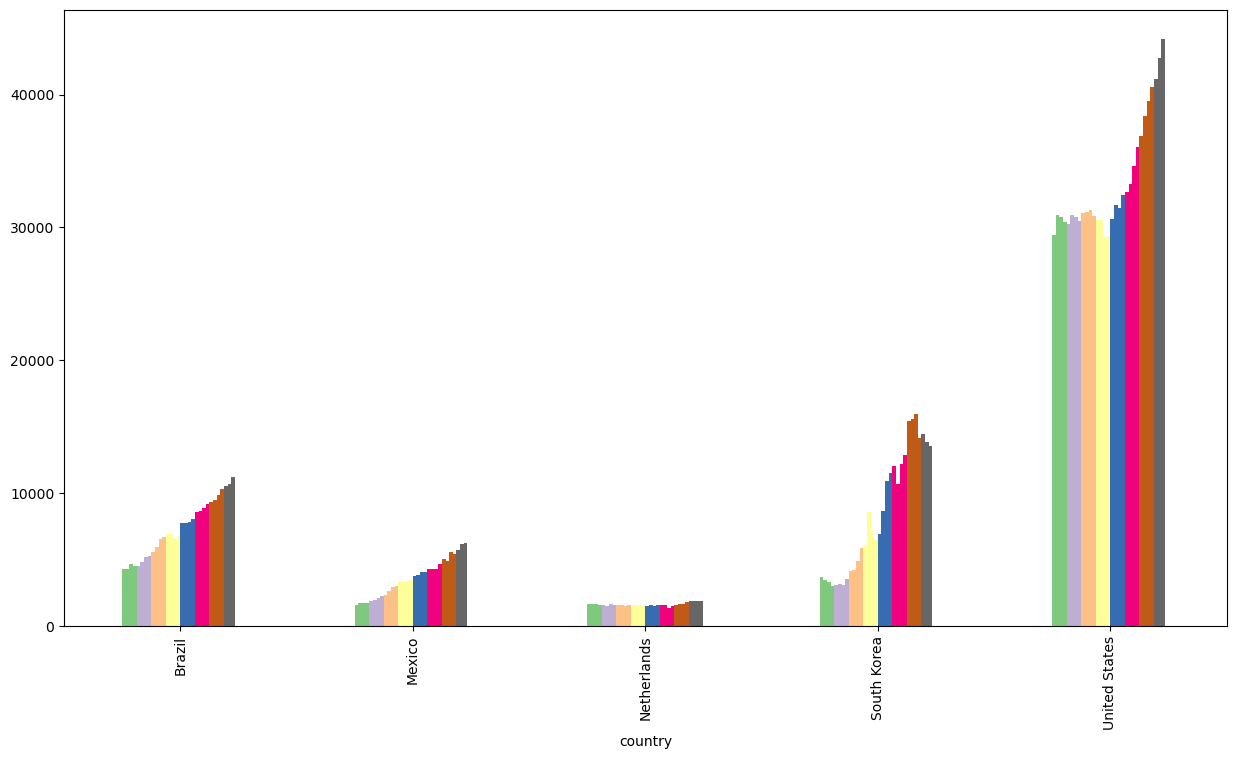

In [67]:
plt.figure(figsize=(8,6))
df = suicide_df.loc[((suicide_df.country=='United States') | (suicide_df.country=='Brazil')
                     | (suicide_df.country=='South Korea') | (suicide_df.country=='Mexico')
                    | (suicide_df.country=='Netherlands'))].groupby(['country','year'])['suicides_no'].sum().unstack(fill_value=0).head(10)
df.plot.bar(figsize=(15,8),legend=False,colormap='Accent')

In [68]:
suicide_df[(suicide_df.year==2015)].groupby(['year','country'])['suicides_no'].sum().sort_values(ascending = False).head(10)

year  country       
2015  United States     44189
      Russia            25432
      Japan             23092
      South Korea       13510
      Brazil            11163
      Germany           10088
      Ukraine            7574
      Mexico             6234
      Poland             5420
      United Kingdom     4910
Name: suicides_no, dtype: int64

<Axes: xlabel='age'>

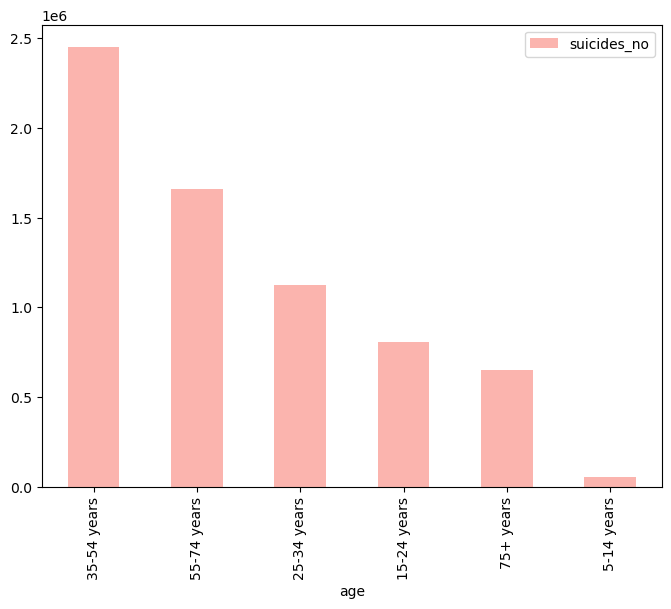

In [69]:
df = suicide_df.groupby(['age'])['suicides_no'].sum().sort_values(ascending=False)
df.plot(kind='bar',legend=True,figsize=(8,6),colormap='Pastel1')

<Axes: xlabel='age'>

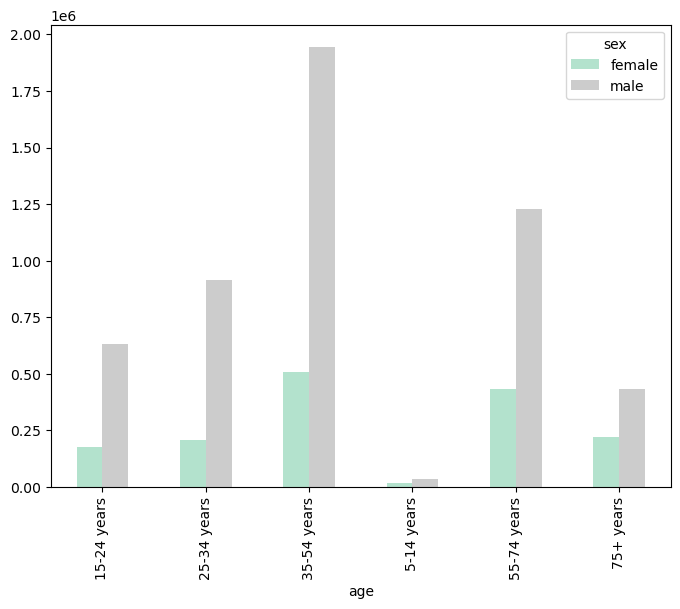

In [70]:
df = suicide_df.groupby(['age','sex'])['suicides_no'].sum().unstack(fill_value=0)
df.plot(kind='bar',legend=True,figsize=(8,6),colormap='Pastel2')

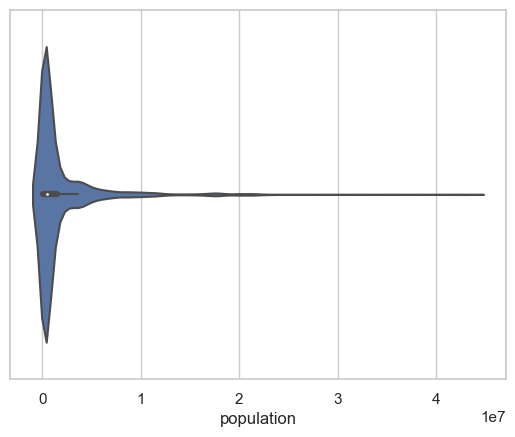

In [71]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=suicide_df["population"])

In [72]:
suicide_df[(suicide_df.year==2015)].groupby(['country'])['population'].sum().sort_values(ascending = False).head(10)

country
United States     300078511
Brazil            191087085
Russia            137018943
Japan             120376310
Mexico            114357884
Germany            78136683
Turkey             71880464
Thailand           61261276
United Kingdom     61082942
Italy              58117697
Name: population, dtype: int64

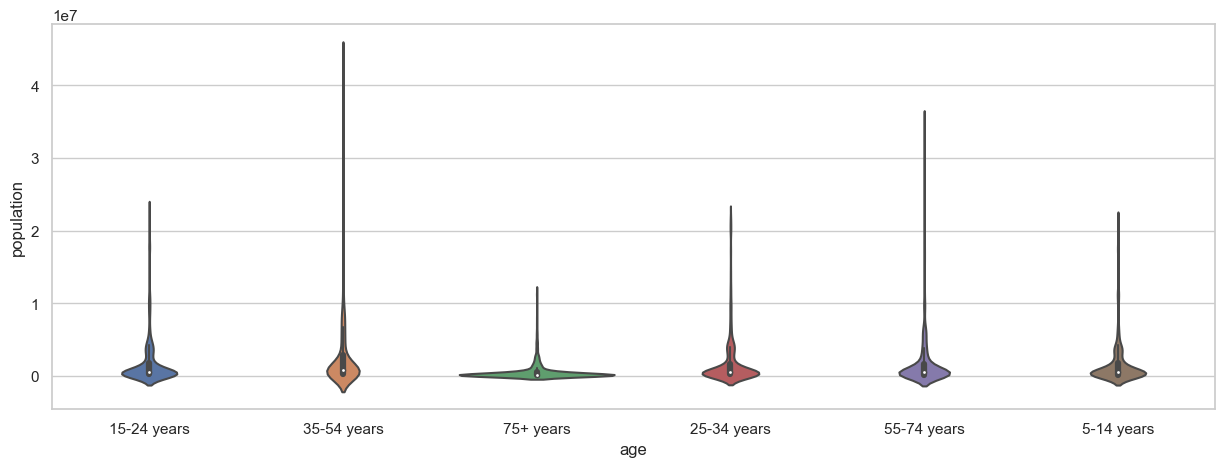

In [73]:
plt.figure(figsize=(15,5))
ax = sns.violinplot(x="age", y="population", data=suicide_df)

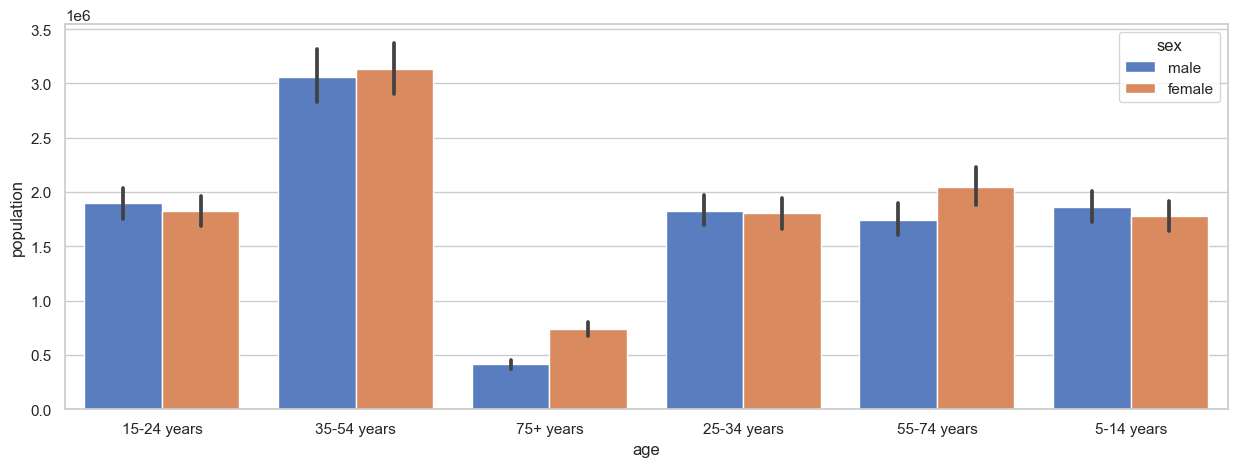

In [74]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="age", y="population", hue="sex", data=suicide_df, palette="muted")

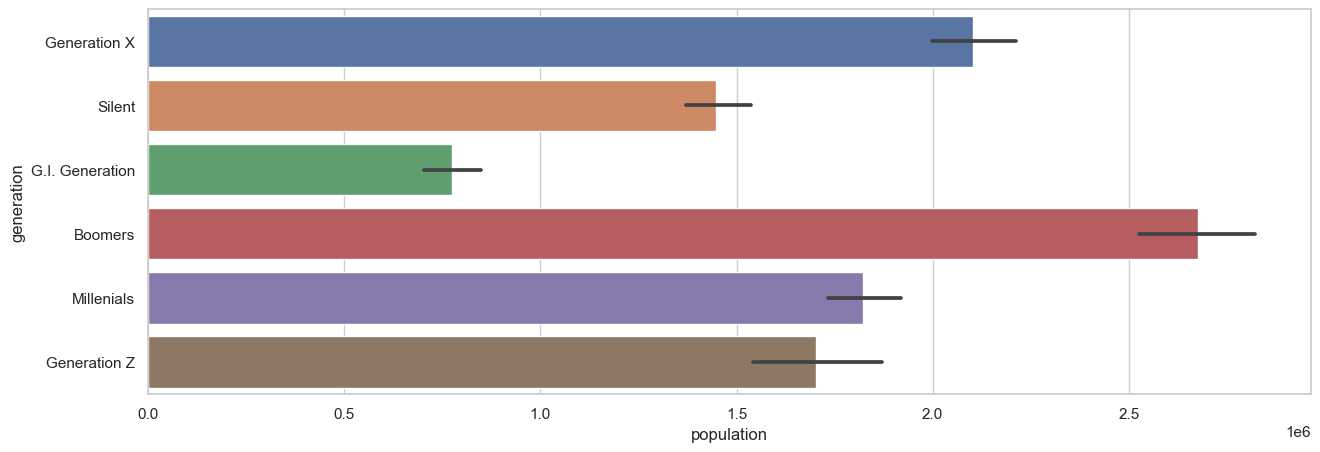

In [75]:
plt.figure(figsize=(15,5))
ax = sns.barplot(y="generation", x="population",data=suicide_df)

In [76]:
suicide_df[(suicide_df.year==2015)].groupby(['year','country'])['Suicides100kPop'].sum().sort_values(ascending = False).head(20)

year  country       
2015  South Korea       389.14
      Lithuania         385.48
      Uruguay           270.02
      Slovenia          264.81
      Hungary           257.27
      Latvia            251.47
      Ukraine           244.72
      Kazakhstan        238.02
      Russia            236.92
      Croatia           229.68
      Japan             206.04
      Serbia            205.97
      Estonia           205.38
      Belgium           196.66
      Austria           194.62
      Cuba              194.31
      United States     175.41
      Czech Republic    170.87
      Poland            166.99
      Switzerland       164.66
Name: Suicides100kPop, dtype: float64

In [77]:
suicide_df.groupby(['year','country'])['Suicides100kPop'].sum().sort_values(ascending = False).head(20)

year  country  
1995  Lithuania    639.30
1996  Lithuania    595.61
1991  Hungary      575.00
2000  Lithuania    571.80
1992  Hungary      570.26
2001  Lithuania    568.98
1994  Russia       567.64
1998  Lithuania    566.36
1997  Lithuania    565.44
1999  Lithuania    561.53
1985  Sri Lanka    558.72
2002  Lithuania    555.62
1995  Russia       547.38
      Latvia       545.62
      Estonia      543.19
1993  Hungary      539.28
1994  Hungary      535.81
2003  Lithuania    530.52
1986  Sri Lanka    529.80
1996  Estonia      528.72
Name: Suicides100kPop, dtype: float64

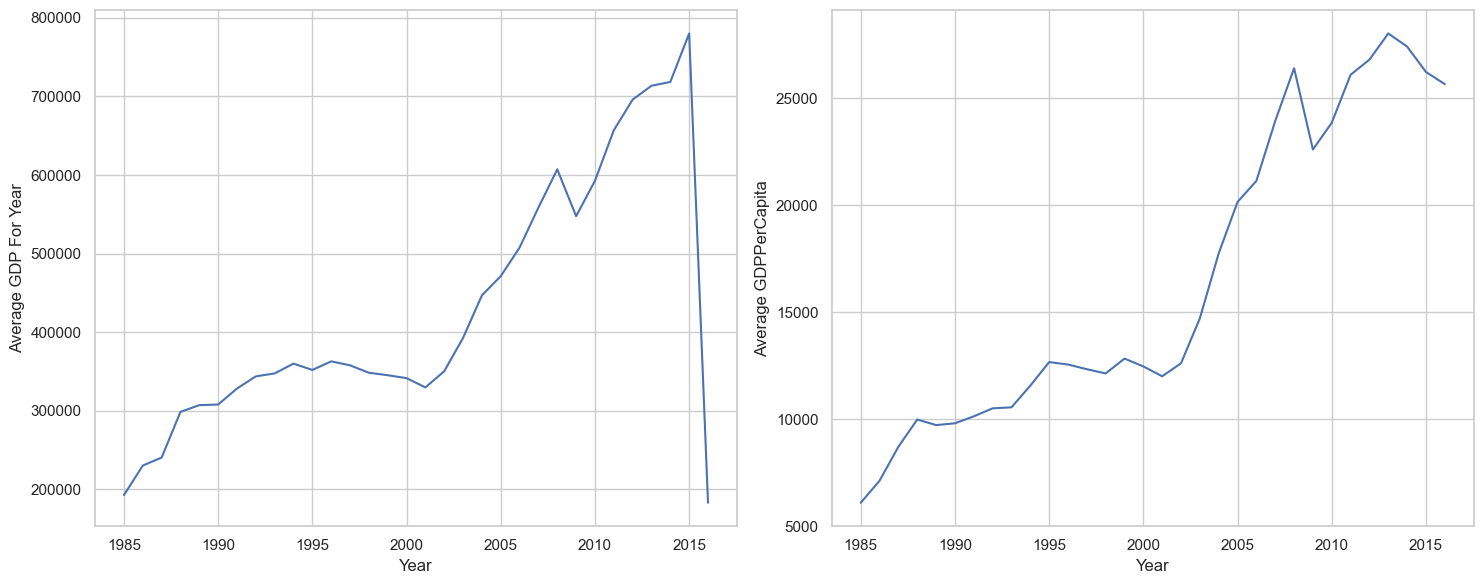

In [78]:
plt.figure(figsize=(15,6))

plt.subplot(121)
df_time = suicide_df.groupby(["year"]).GDPForYear.mean()
sns.lineplot(data = df_time)
plt.xlabel("Year")
plt.ylabel("Average GDP For Year")

plt.subplot(122)
df_time = suicide_df.groupby(["year"]).GDPPerCapita.mean()
sns.lineplot(data = df_time)
plt.xlabel("Year")
plt.ylabel("Average GDPPerCapita")
plt.tight_layout()
plt.show()

<Axes: xlabel='country'>

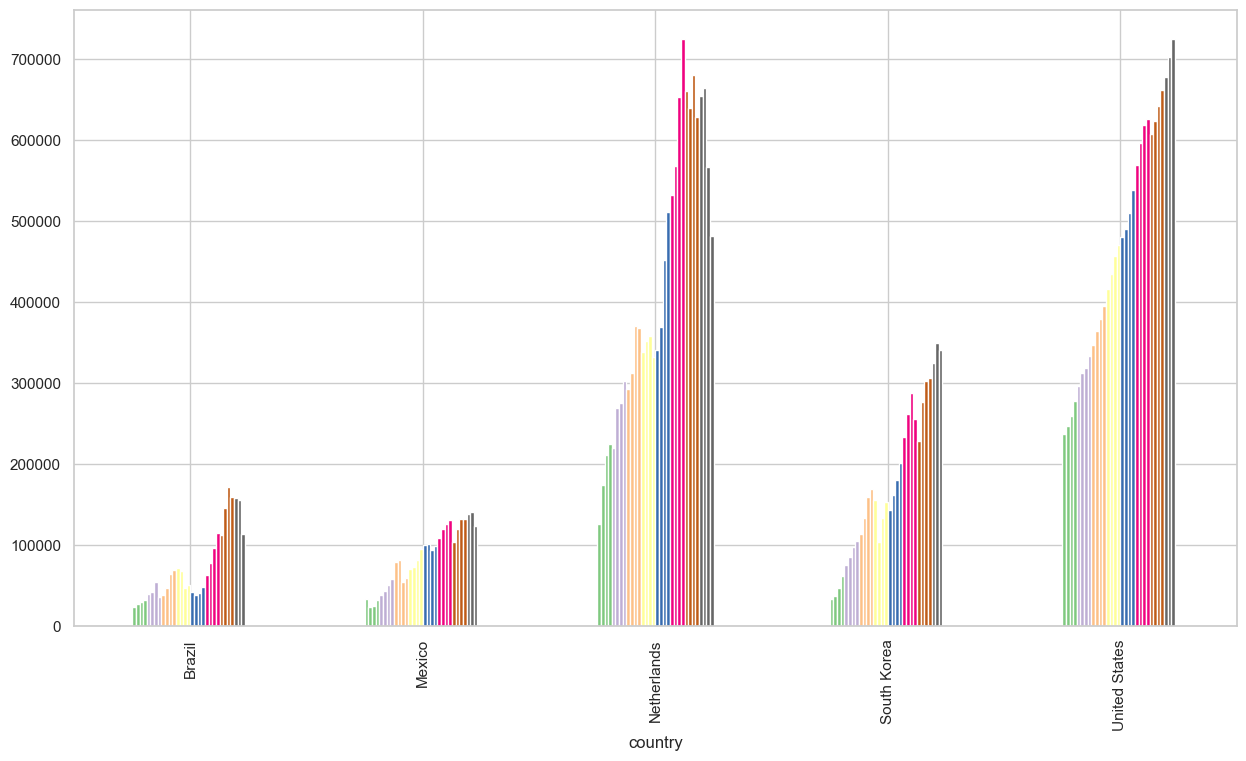

In [79]:
df = suicide_df.loc[((suicide_df.country=='United States') | (suicide_df.country=='Brazil')
                     | (suicide_df.country=='South Korea') | (suicide_df.country=='Mexico')
                    | (suicide_df.country=='Netherlands'))].groupby(['country','year'])['GDPPerCapita'].sum().unstack(fill_value=0).head(10)
df.plot.bar(figsize=(15,8),legend=False,colormap='Accent')

In [80]:
suicide_df.drop(['latitude', 'longitude', 'suicide_country'], axis=1,inplace=True)

In [ ]:
sns.pairplot(suicide_df, hue="age")
plt.show()